In [176]:
import numpy as np
import torch as tc
import matplotlib.pyplot as plt
import pickle
from scipy import stats

# Read files

In [137]:
with open('../data/huge_results.pkl', 'rb') as f:
    meta = pickle.load(f)

In [138]:
runs = meta[0,0,:,0]

In [139]:
runs = [r[0] for r in runs]

In [140]:
run_means = [r.mean() for r in runs]
run_stds = [r.std() for r in runs]

In [141]:
run_means
run_stds

[tensor(0.7717),
 tensor(0.9623),
 tensor(0.7993),
 tensor(0.8230),
 tensor(0.8978),
 tensor(0.8811),
 tensor(0.8552),
 tensor(0.8226),
 tensor(0.8759)]

(array([  7.,   9.,  15.,  29.,  55.,  94., 106., 129., 187., 107., 105.,
        214., 159., 179., 104., 114.,  33.,  19.,  11.,  24.]),
 array([5.00783634, 5.24429846, 5.4807601 , 5.71722221, 5.95368385,
        6.19014597, 6.42660809, 6.66306973, 6.89953184, 7.13599348,
        7.3724556 , 7.60891771, 7.84537935, 8.08184147, 8.31830311,
        8.5547657 , 8.79122734, 9.02768898, 9.26415062, 9.50061321,
        9.73707485]),
 <BarContainer object of 20 artists>)

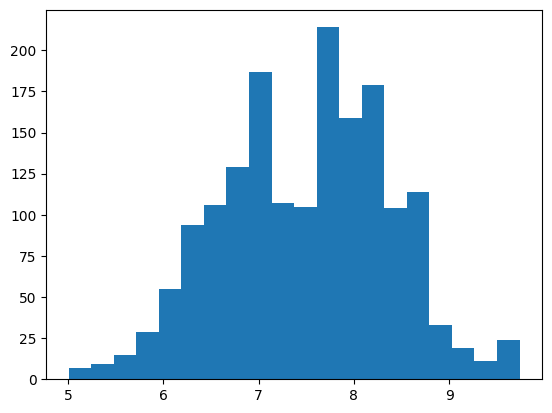

In [142]:
plt.hist(runs[8], bins=20)

In [222]:
def getkl(data):
    data, _ = data.sort()
    px = [sum(data < x)/len(data) for x in data[1:]]
    qx = tc.distributions.Normal(7.25, 0.9129).cdf(data[1:])
    kl = [px[i]*tc.log(px[i]/qx[i]) for i in range(len(data)-1)]
    return sum(kl)

In [230]:
kl_result = [getkl(r) for r in runs]

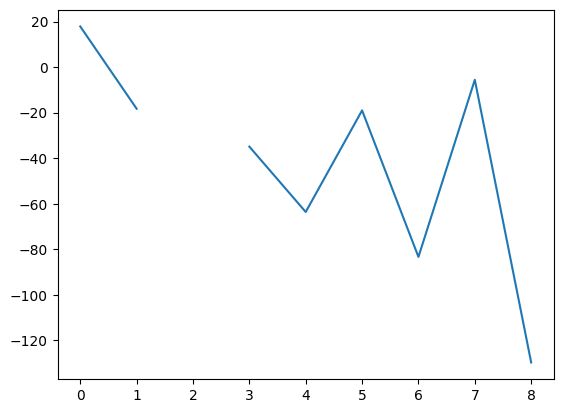

In [235]:
plt.plot(kl_result)

# Runs

In [654]:
with open('../data/smc_10runs/results.pkl', 'rb') as f:
    meta = pickle.load(f)

In [655]:
meta.shape

(1, 1, 70, 1)

In [656]:
runs = meta[0,0,:,0]

In [657]:
run_samples = [r[0] for r in runs]
run_ess = [r[1] for r in runs]
run_time = [r[2] for r in runs]

In [658]:
run_time = np.asarray(run_time)
run_time = run_time.reshape(10, 7)

In [659]:
run_time

array([[ 2.39693403,  7.06486917, 11.61280489, 16.20015502, 21.54943585,
        26.26061797, 30.92582607],
       [ 2.37728596,  6.99209189, 11.84417295, 16.83568406, 21.98452306,
        26.31830597, 30.96547103],
       [ 2.37266183,  7.13238406, 11.90586019, 16.70258307, 20.96335101,
        26.60237527, 31.46962881],
       [ 2.29699683,  6.94689012, 11.76182199, 16.62899995, 21.37209082,
        26.11960411, 31.36086988],
       [ 2.40887094,  7.1223619 , 12.03390598, 16.67803907, 21.37257409,
        26.668396  , 32.40716314],
       [ 2.43380713,  7.15675688, 12.07912683, 16.76236916, 21.38665104,
        26.71668291, 31.36358404],
       [ 2.30211306,  7.07544708, 11.89018917, 16.72589397, 21.42410994,
        27.33305192, 31.20699692],
       [ 2.48257709,  7.19748306, 11.56895113, 17.42091894, 22.16825199,
        26.29115582, 31.50111508],
       [ 2.38494992,  7.06632614, 11.9692359 , 16.61044192, 21.36234379,
        26.31241798, 31.54682803],
       [ 2.23135209,  6.9585

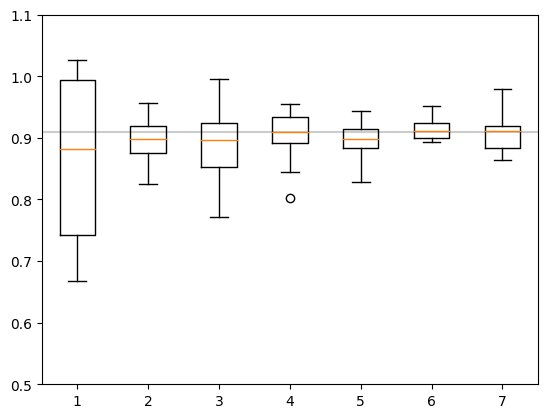

In [660]:
run_sds = [r.std() for r in run_samples]
run_sds = np.asarray(run_sds)
run_sds = run_sds.reshape(10,7)
plt.boxplot(run_sds, whis = 2)
plt.ylim([0.5, 1.1])
xmin, xmax = plt.xlim()
plt.hlines(0.91, xmin, xmax, color="black", alpha=0.2)
plt.show()
plt.close()

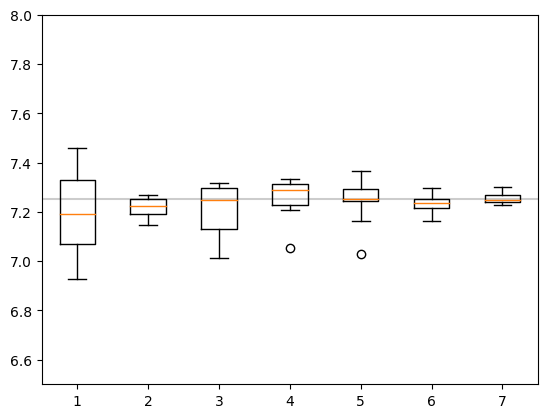

In [661]:
run_means = [r.mean() for r in run_samples]
run_means = np.asarray(run_means)
run_means = run_means.reshape(10,7)
plt.boxplot(run_means, whis=2)
xmin, xmax = plt.xlim()
plt.hlines(7.25, xmin, xmax, color="black", alpha=0.2)
plt.ylim([6.5, 8])
plt.show()
plt.close()

In [662]:
run_samples = run_samples.reshape(10, 7)

AttributeError: 'list' object has no attribute 'reshape'

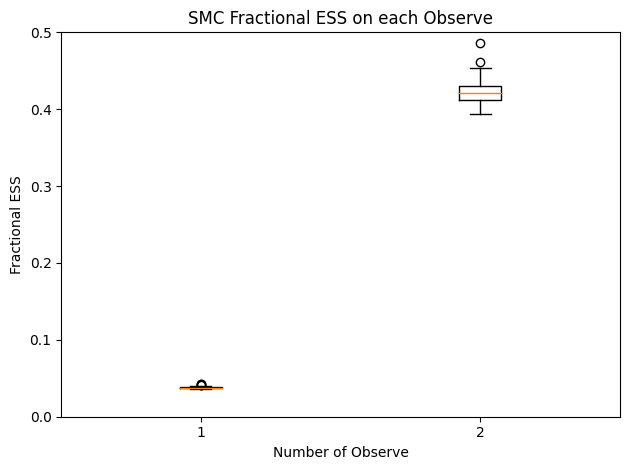

In [663]:
plt.boxplot(tc.t(tc.tensor(run_ess)))
plt.xlabel("Number of Observe")
plt.ylabel("Fractional ESS")
plt.title("SMC Fractional ESS on each Observe")
plt.ylim([0, 0.5])
plt.tight_layout()

In [714]:
with open('../data/1211-0117_rejsmc_push1_30times/results.pkl', 'rb') as f:
    meta_rej = pickle.load(f)

In [715]:
runs = meta_rej[0,0,:,0]

In [716]:
meta_rej.shape

(1, 1, 70, 1)

In [717]:
rej_samples = [r[0] for r in runs]
rej_ess = [r[1] for r in runs]
rej_time = [r[2] for r in runs]

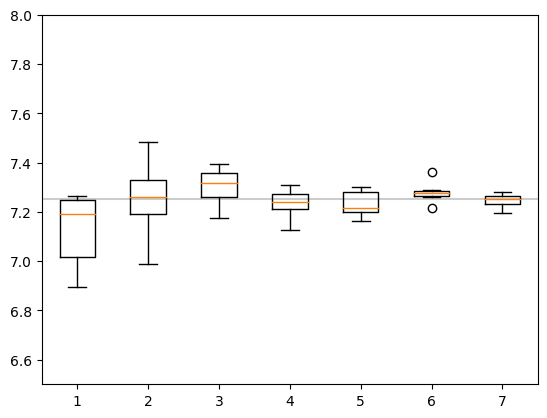

In [718]:
rej_means = [r.mean() for r in rej_samples]
rej_means = np.asarray(rej_means)
rej_means = rej_means.reshape(10,7)
plt.boxplot(rej_means, whis=2)
xmin, xmax = plt.xlim()
plt.hlines(7.25, xmin, xmax, color="black", alpha=0.2)
plt.ylim([6.5, 8])
plt.show()
plt.close()

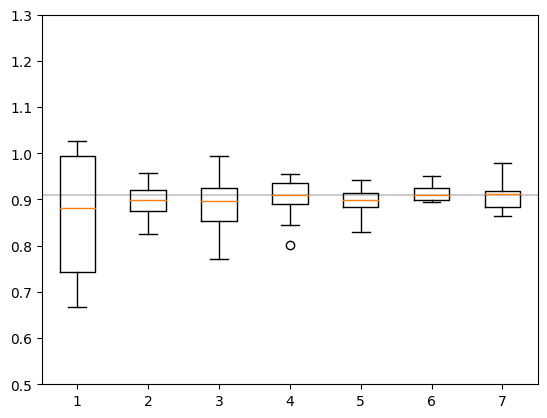

In [719]:
rej_sds = [r.std() for r in rej_samples]
rej_sds = np.asarray(rej_sds)
rej_sds = rej_sds.reshape(10, 7)
plt.boxplot(run_sds, whis = 2)
xmin, xmax = plt.xlim()
plt.ylim([0.5, 1.3])
plt.hlines(0.91, xmin, xmax, color="black", alpha=0.2)
plt.show()
plt.close()

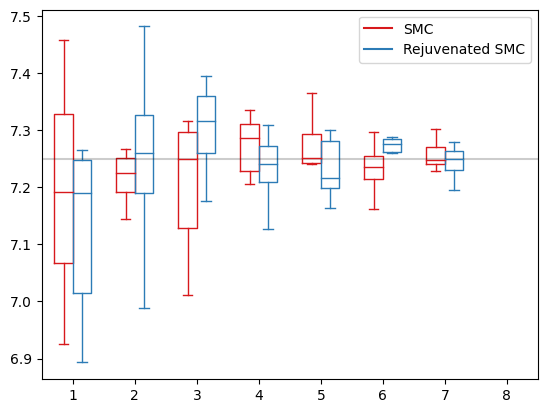

In [720]:
p1 = run_means
p2 = rej_means

ticks = range(1, (len(p1)+1))
ticks = [str(tick) for tick in ticks]


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(p1, whis= 1.5, positions=np.array(range(7))*2.0-0.3, sym='', widths=0.6)
bpr = plt.boxplot(p2, whis= 1.5, positions=np.array(range(7))*2.0+0.3, sym='', widths=0.6)


set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='SMC')
plt.plot([], c='#2C7BB6', label=
         'Rejuvenated SMC')
plt.legend()
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1, 15)
# plt.ylim(0, 1)
# plt.tight_layout()
xmin, xmax = plt.xlim()
plt.hlines(7.25, xmin, xmax, color="black", alpha=0.2)
plt.show()

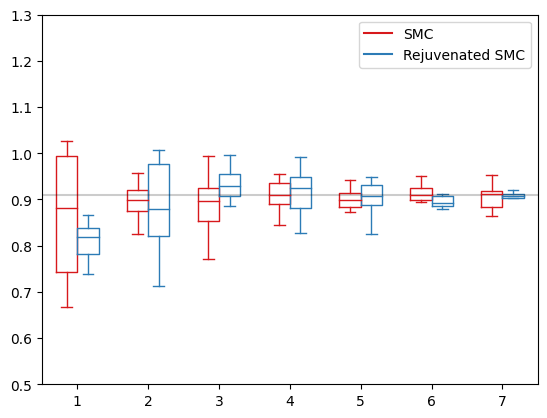

In [721]:
p1 = run_sds
p2 = rej_sds

ticks = range(1, (len(p1)+1))
ticks = [str(tick) for tick in ticks]


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(p1, positions=np.array(range(7))*2.0-0.3, sym='', widths=0.6)
bpr = plt.boxplot(p2, positions=np.array(range(7))*2.0+0.3, sym='', widths=0.6)


set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='SMC')
plt.plot([], c='#2C7BB6', label=
         'Rejuvenated SMC')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1, 13)
plt.ylim(0.5, 1.3)
xmin, xmax = plt.xlim()
plt.hlines(0.91, xmin, xmax, color="black", alpha=0.2)
plt.show()